## รายชื่อสมาชิก
### 64160043 นางสาวจิดาภา ใหม่พิมพ์
### 64160259 นางสาวปาณิศา ศรีทองอยู่

## **Setup Environment**


In [ ]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import joblib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

## **Gathering Data**

In [ ]:
#Load the data
uploaded = files.upload() #นำเข้าข้อมูลจากไฟล์ภายนอก

Saving TravelInsurancePrediction.csv to TravelInsurancePrediction.csv


In [ ]:
df = pd.read_csv('TravelInsurancePrediction.csv') #กำหนดให้ DataFrame ที่ได้จากการอ่านไฟล์ CSV ถูกเก็บไว้ในตัวแปรชื่อ df ใช้สำหรับอ่านข้อมูลจากไฟล์ CSV และเปลี่ยนข้อมูลในไฟล์ CSV ให้เป็น DataFrame

## **Understanding the Data**

In [ ]:
df.head(10) #ดูข้อมูลส่วนต้นจำนวน 10 ตัวอย่าง (แถว)

Unnamed: 0  Age               Employment Type GraduateOrNot  AnnualIncome  \
0           0   31             Government Sector           Yes        400000   
1           1   31  Private Sector/Self Employed           Yes       1250000   
2           2   34  Private Sector/Self Employed           Yes        500000   
3           3   28  Private Sector/Self Employed           Yes        700000   
4           4   28  Private Sector/Self Employed           Yes        700000   
5           5   25  Private Sector/Self Employed            No       1150000   
6           6   31             Government Sector           Yes       1300000   
7           7   31  Private Sector/Self Employed           Yes       1350000   
8           8   28  Private Sector/Self Employed           Yes       1450000   
9           9   33             Government Sector           Yes        800000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              6                1            No                  No   
1              7                0            No                  No   
2              4                1            No                  No   
3              3                1            No                  No   
4              8                1           Yes                  No   
5              4                0            No                  No   
6              4                0            No                  No   
7              3                0           Yes                 Yes   
8              6                1           Yes                 Yes   
9              3                0           Yes                  No   

   TravelInsurance  
0                0  
1                0  
2                1  
3                0  
4                0  
5                0  
6                0  
7                1  
8                1  
9                0

In [ ]:
df.dtypes #แสดงประเภทข้อมูล ของแต่ละคอลัมน์ใน DataFrame

Unnamed: 0              int64
Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

**checking the missing values**

Missing value

get a count of all of the columns that contain empty (NaN, NAN, na) values.

In [ ]:
#Count the empty (NaN, NAN, na) values in each column
df.isna().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [ ]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction.
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()

  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)

  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})

  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
  mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
  '% of Total Values', ascending=False).round(1)

  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
  "There are " + str(mis_val_table_ren_columns.shape[0]) +
  " columns that have missing values.")

  # Return the dataframe with missing information
  return mis_val_table_ren_columns

In [ ]:
missing = missing_values_table(df)
print(missing)

Your selected dataframe has 10 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [ ]:
# Handling missing values
#setting strategy to 'most frequent' to impute by the mean
# strategy can also be mean or median
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:,:] = imputer.fit_transform(df)

In [ ]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [ ]:
df.describe(include='all')

Unnamed: 0          Age               Employment Type GraduateOrNot  \
count   1987.000000  1987.000000                          1987          1987   
unique          NaN          NaN                             2             2   
top             NaN          NaN  Private Sector/Self Employed           Yes   
freq            NaN          NaN                          1417          1692   
mean     993.000000    29.650226                           NaN           NaN   
std      573.741812     2.913308                           NaN           NaN   
min        0.000000    25.000000                           NaN           NaN   
25%      496.500000    28.000000                           NaN           NaN   
50%      993.000000    29.000000                           NaN           NaN   
75%     1489.500000    32.000000                           NaN           NaN   
max     1986.000000    35.000000                           NaN           NaN   

        AnnualIncome  FamilyMembers  ChronicDiseases FrequentFlyer  \
count   1.987000e+03    1987.000000      1987.000000          1987   
unique           NaN            NaN              NaN             2   
top              NaN            NaN              NaN            No   
freq             NaN            NaN              NaN          1570   
mean    9.327630e+05       4.752894         0.277806           NaN   
std     3.768557e+05       1.609650         0.448030           NaN   
min     3.000000e+05       2.000000         0.000000           NaN   
25%     6.000000e+05       4.000000         0.000000           NaN   
50%     9.000000e+05       5.000000         0.000000           NaN   
75%     1.250000e+06       6.000000         1.000000           NaN   
max     1.800000e+06       9.000000         1.000000           NaN   

       EverTravelledAbroad  TravelInsurance  
count                 1987      1987.000000  
unique                   2              NaN  
top                     No              NaN  
freq                  1607              NaN  
mean                   NaN         0.357323  
std                    NaN         0.479332  
min                    NaN         0.000000  
25%                    NaN         0.000000  
50%                    NaN         0.000000  
75%                    NaN         1.000000  
max                    NaN         1.000000

In [ ]:
df.iloc[336,:]

Unnamed: 0                           336
Age                                   32
Employment Type        Government Sector
GraduateOrNot                        Yes
AnnualIncome                      350000
FamilyMembers                          9
ChronicDiseases                        1
FrequentFlyer                         No
EverTravelledAbroad                   No
TravelInsurance                        0
Name: 336, dtype: object

In [ ]:
# dropping the 336th row due to its faulty value in sex variable
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.tail(10)

Age               Employment Type GraduateOrNot  AnnualIncome  \
1977   25  Private Sector/Self Employed            No       1350000   
1978   34  Private Sector/Self Employed           Yes        700000   
1979   28  Private Sector/Self Employed           Yes       1100000   
1980   25  Private Sector/Self Employed            No       1150000   
1981   27             Government Sector           Yes        850000   
1982   33  Private Sector/Self Employed           Yes       1500000   
1983   28  Private Sector/Self Employed           Yes       1750000   
1984   28  Private Sector/Self Employed           Yes       1150000   
1985   34  Private Sector/Self Employed           Yes       1000000   
1986   34  Private Sector/Self Employed           Yes        500000   

      FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
1977              6                0            No                 Yes   
1978              5                0            No                  No   
1979              4                1            No                  No   
1980              5                1            No                  No   
1981              3                0            No                  No   
1982              4                0           Yes                 Yes   
1983              5                1            No                 Yes   
1984              6                1            No                  No   
1985              6                0           Yes                 Yes   
1986              4                0            No                  No   

      TravelInsurance  
1977                1  
1978                1  
1979                0  
1980                0  
1981                1  
1982                1  
1983                0  
1984                0  
1985                1  
1986                0

In [ ]:
df.drop(columns = ['FrequentFlyer'], inplace = True)
df.tail(10)

Age               Employment Type GraduateOrNot  AnnualIncome  \
1977   25  Private Sector/Self Employed            No       1350000   
1978   34  Private Sector/Self Employed           Yes        700000   
1979   28  Private Sector/Self Employed           Yes       1100000   
1980   25  Private Sector/Self Employed            No       1150000   
1981   27             Government Sector           Yes        850000   
1982   33  Private Sector/Self Employed           Yes       1500000   
1983   28  Private Sector/Self Employed           Yes       1750000   
1984   28  Private Sector/Self Employed           Yes       1150000   
1985   34  Private Sector/Self Employed           Yes       1000000   
1986   34  Private Sector/Self Employed           Yes        500000   

      FamilyMembers  ChronicDiseases EverTravelledAbroad  TravelInsurance  
1977              6                0                 Yes                1  
1978              5                0                  No                1  
1979              4                1                  No                0  
1980              5                1                  No                0  
1981              3                0                  No                1  
1982              4                0                 Yes                1  
1983              5                1                 Yes                0  
1984              6                1                  No                0  
1985              6                0                 Yes                1  
1986              4                0                  No                0

In [ ]:
df.drop(columns = ['EverTravelledAbroad'], inplace = True)
df.tail(10)

Age               Employment Type GraduateOrNot  AnnualIncome  \
1977   25  Private Sector/Self Employed            No       1350000   
1978   34  Private Sector/Self Employed           Yes        700000   
1979   28  Private Sector/Self Employed           Yes       1100000   
1980   25  Private Sector/Self Employed            No       1150000   
1981   27             Government Sector           Yes        850000   
1982   33  Private Sector/Self Employed           Yes       1500000   
1983   28  Private Sector/Self Employed           Yes       1750000   
1984   28  Private Sector/Self Employed           Yes       1150000   
1985   34  Private Sector/Self Employed           Yes       1000000   
1986   34  Private Sector/Self Employed           Yes        500000   

      FamilyMembers  ChronicDiseases  TravelInsurance  
1977              6                0                1  
1978              5                0                1  
1979              4                1                0  
1980              5                1                0  
1981              3                0                1  
1982              4                0                1  
1983              5                1                0  
1984              6                1                0  
1985              6                0                1  
1986              4                0                0

In [ ]:
df.drop(columns = ['GraduateOrNot'], inplace = True)
df.tail(10)

Age               Employment Type  AnnualIncome  FamilyMembers  \
1977   25  Private Sector/Self Employed       1350000              6   
1978   34  Private Sector/Self Employed        700000              5   
1979   28  Private Sector/Self Employed       1100000              4   
1980   25  Private Sector/Self Employed       1150000              5   
1981   27             Government Sector        850000              3   
1982   33  Private Sector/Self Employed       1500000              4   
1983   28  Private Sector/Self Employed       1750000              5   
1984   28  Private Sector/Self Employed       1150000              6   
1985   34  Private Sector/Self Employed       1000000              6   
1986   34  Private Sector/Self Employed        500000              4   

      ChronicDiseases  TravelInsurance  
1977                0                1  
1978                0                1  
1979                1                0  
1980                1                0  
1981                0                1  
1982                0                1  
1983                1                0  
1984                1                0  
1985                0                1  
1986                0                0

In [ ]:
df.shape

(1987, 6)

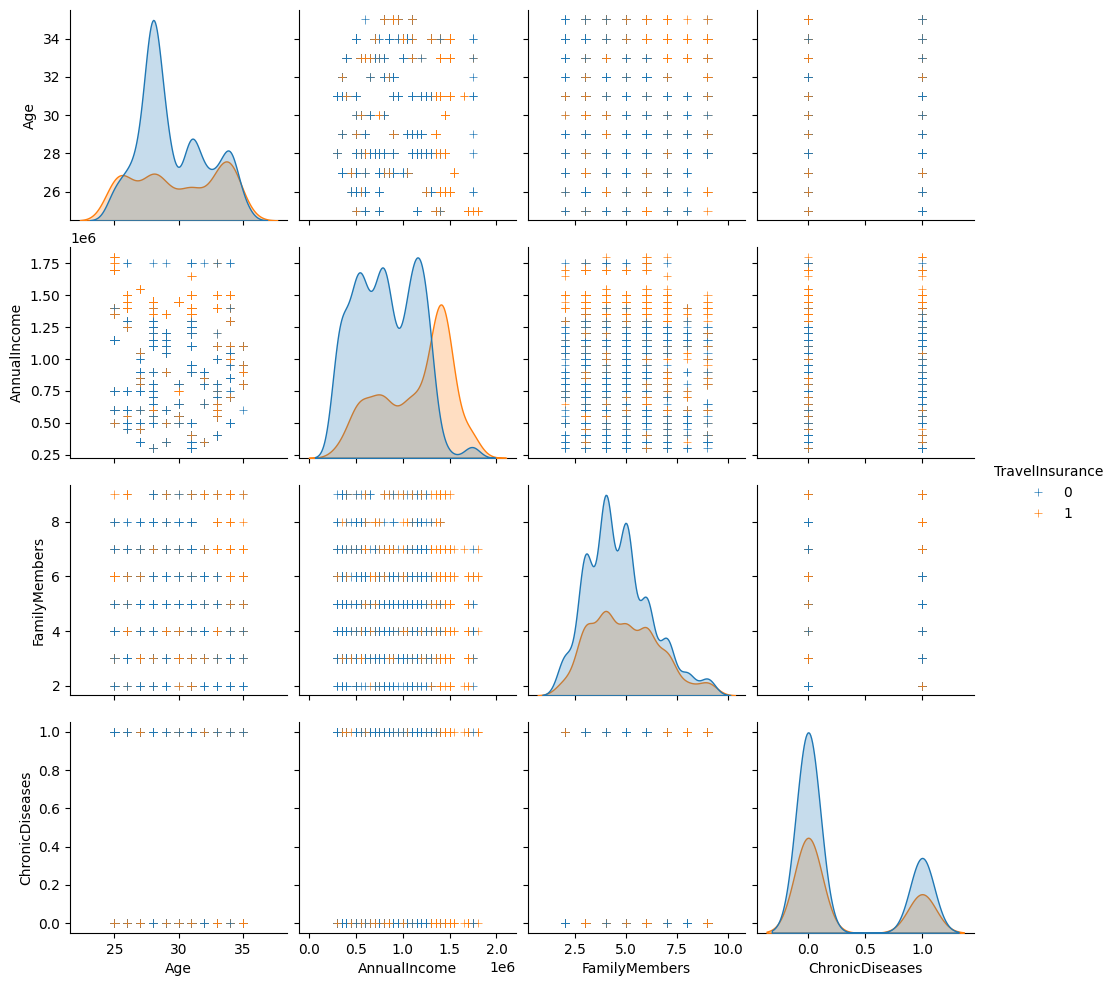

In [ ]:
# create a scatter matrix from the dataframe, color by y_train
sns.pairplot(df, hue='TravelInsurance', markers='+')
plt.show()

<ipython-input-21-29d4b3e36830>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r')


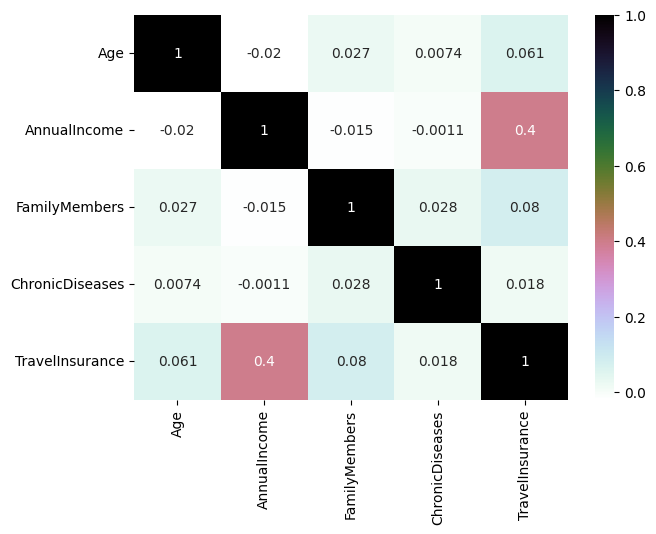

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r')
plt.show()

## Splitting Data

Split the data set into a feature data set also known as the independent data set (X), and a target data set also known as the dependent data set (Y).

In [ ]:
#Slit df into X_input and Y_output

In [ ]:
X_input = df.iloc[:,2:6].values
y_output = df.iloc[:,0].values

In [ ]:
X_input

array([[ 400000,       6,       1,       0],
       [1250000,       7,       0,       0],
       [ 500000,       4,       1,       1],
       ...,
       [1150000,       6,       1,       0],
       [1000000,       6,       0,       1],
       [ 500000,       4,       0,       0]])

In [ ]:
y_output

array([31, 31, 34, ..., 28, 34, 34])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_input, y_output, stratify=df['AnnualIncome'],  test_size = 0.2, random_state = 0)

## **Choose Model**

In [ ]:
KNN = KNeighborsClassifier()
GND = GaussianNB()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()

ensemble_clf = [KNN, GND, DT, RF]

In [ ]:
param1 = {'criterion' : ['gini', 'entropy'], 'max_depth' : np.arange(3,15)}
param2 = {'n_estimators' : [200,700],  'max_features' : ['auto', 'sqrt', 'log2']}
param3 = {'n_neighbors' : np.arange(1,10)}
param5 = {}

parameters_list = [param1, param2, param3, param5]
model_log = ["_dt","_rf", "_knn", "_gnb"]

## **Training and Hyperparameter Tuning**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
X_test

array([[ 300000,       4,       1,       1],
       [ 800000,       7,       0,       1],
       [1300000,       6,       0,       1],
       ...,
       [1000000,       4,       1,       0],
       [1350000,       6,       0,       1],
       [ 550000,       3,       1,       1]])

In [ ]:
y_test

array([28, 35, 34, 34, 26, 25, 34, 33, 28, 28, 28, 26, 34, 32, 35, 31, 28,
       28, 34, 34, 26, 27, 29, 28, 28, 30, 30, 27, 26, 25, 27, 26, 34, 34,
       25, 33, 33, 27, 26, 25, 34, 31, 28, 32, 29, 31, 28, 30, 28, 31, 33,
       33, 34, 28, 25, 28, 31, 35, 27, 25, 27, 31, 28, 29, 28, 30, 28, 28,
       28, 28, 28, 25, 29, 33, 34, 32, 32, 34, 31, 29, 28, 34, 34, 28, 28,
       29, 26, 28, 34, 27, 33, 30, 28, 28, 25, 35, 29, 33, 32, 34, 31, 28,
       28, 34, 29, 29, 27, 34, 31, 33, 25, 31, 27, 25, 28, 25, 34, 28, 29,
       31, 31, 28, 31, 28, 34, 28, 31, 29, 34, 28, 33, 31, 34, 34, 31, 26,
       29, 34, 33, 29, 28, 31, 28, 26, 34, 28, 28, 34, 25, 33, 33, 27, 28,
       29, 28, 32, 28, 29, 28, 28, 29, 34, 28, 33, 33, 28, 29, 30, 31, 26,
       31, 32, 34, 27, 28, 26, 34, 34, 31, 29, 28, 28, 31, 28, 27, 26, 34,
       28, 33, 28, 28, 33, 34, 31, 28, 25, 28, 26, 31, 25, 27, 25, 28, 26,
       30, 31, 25, 33, 33, 28, 27, 31, 33, 34, 35, 27, 28, 28, 29, 34, 34,
       32, 34, 31, 28, 27

In [ ]:
y_classfied = knn.predict(X_test)

In [ ]:
y_classfied

array([28, 35, 34, 34, 34, 25, 28, 34, 25, 25, 29, 28, 34, 27, 28, 31, 28,
       28, 34, 28, 34, 30, 29, 28, 31, 28, 30, 31, 34, 26, 27, 29, 34, 34,
       25, 33, 26, 27, 30, 26, 34, 31, 26, 27, 32, 33, 28, 28, 28, 31, 26,
       30, 28, 25, 25, 31, 28, 28, 26, 25, 32, 28, 28, 28, 28, 28, 25, 28,
       28, 28, 31, 28, 28, 33, 34, 32, 35, 34, 25, 29, 28, 34, 34, 28, 28,
       29, 26, 28, 34, 27, 26, 28, 34, 28, 26, 31, 29, 28, 27, 27, 26, 28,
       28, 34, 31, 28, 27, 32, 28, 34, 26, 26, 32, 25, 31, 28, 34, 28, 28,
       31, 26, 28, 28, 28, 34, 28, 31, 29, 31, 28, 34, 31, 27, 34, 34, 26,
       28, 25, 28, 29, 32, 31, 34, 26, 34, 28, 30, 34, 28, 25, 28, 27, 28,
       25, 28, 28, 28, 29, 29, 26, 25, 27, 31, 26, 28, 31, 34, 35, 31, 34,
       34, 32, 34, 32, 26, 28, 27, 34, 27, 27, 25, 30, 26, 28, 34, 25, 26,
       34, 28, 28, 28, 29, 34, 26, 27, 28, 28, 25, 28, 25, 27, 26, 34, 27,
       34, 28, 28, 29, 30, 30, 34, 34, 31, 34, 34, 26, 25, 28, 28, 27, 27,
       35, 34, 31, 31, 27

# 9. Final Model

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_classified = model.predict(X_test)
print(classification_report(y_test, y_classified))

              precision    recall  f1-score   support

          25       0.46      0.71      0.56        35
          26       0.24      0.38      0.29        29
          27       0.26      0.43      0.33        23
          28       0.47      0.50      0.48       109
          29       0.33      0.15      0.21        39
          30       0.50      0.23      0.32        13
          31       0.45      0.33      0.38        45
          32       0.31      0.33      0.32        15
          33       0.50      0.12      0.20        33
          34       0.53      0.59      0.56        49
          35       0.10      0.12      0.11         8

    accuracy                           0.41       398
   macro avg       0.38      0.36      0.34       398
weighted avg       0.42      0.41      0.40       398



# 10. Save Model

In [41]:
# # Save the model to a file
# joblib.dump(model, 'finalmodel.joblib')

In [43]:
# save the model to disk
import pickle
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# 11. Load Model

In [45]:
# #โหลด model ที่เซฟไว้เพื่อนำมาใช้งาน
# loaded_model = joblib.load('finalmodel.joblib')
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


In [46]:
df.columns

Index(['Age', 'Employment Type', 'AnnualIncome', 'FamilyMembers',
       'ChronicDiseases', 'TravelInsurance'],
      dtype='object')